# Part I - **Analyse exploratoire de l'ensemble de données "prosperLoanData"**
## Par Abdel Karim MOUAMFON
## **Plan d'exploration**
### <a href="#intro">Introduction</a>
### I. <a href="#pp">Préparation préliminaire</a>
### II. <a href="#ed">Exploration des données univariées, bivariées et multivariées</a>
### <a href="#ccsion">Conclusion</a>

<a div="intro"></a>
## **Introduction**
> L'ensemble de données **prosperLoanData** dont nous sommes sur le point d'explorer contient 113 937 prêts avec 81 variables sur chaque prêt, y compris le montant du prêt, le taux de l'emprunteur (ou taux d'intérêt), le statut actuel du prêt, le revenu de l'emprunteur, et bien d'autres. 

<a div="pp"></a>
## **I- Préparation préliminaire**

In [2]:
# Importation des paquets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [3]:
# Import des données
df = pd.read_csv('prosperLoanData.csv')

In [4]:
# Explorons la structure de la table
print(df.shape)
print(df.dtypes)

(113937, 81)
ListingKey                      object
ListingNumber                    int64
ListingCreationDate             object
CreditGrade                     object
Term                             int64
                                ...   
PercentFunded                  float64
Recommendations                  int64
InvestmentFromFriendsCount       int64
InvestmentFromFriendsAmount    float64
Investors                        int64
Length: 81, dtype: object


In [5]:
# Visualisation de la dataset
pd.set_option('display.max_columns', None)
df.head(10)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN

In [6]:
# Suppression des colonnes à valeur quasi null ou sans valeur
df = df.drop(['GroupKey','IsBorrowerHomeowner','TradesOpenedLast6Months','MemberKey','LoanOriginationQuarter','CurrentlyInGroup','OnTimeProsperPayments','PercentFunded','ProsperPrincipalOutstanding','ScorexChangeAtTimeOfListing','TotalProsperLoans','TotalProsperPaymentsBilled','PublicRecordsLast10Years','InvestmentFromFriendsAmount','InvestmentFromFriendsCount','Recommendations','LP_NonPrincipalRecoverypayments','LP_NetPrincipalLoss','LP_GrossPrincipalLoss','LP_CollectionFees','LoanFirstDefaultedCycleNumber','LoanCurrentDaysDelinquent','ProsperPaymentsOneMonthPlusLate','ProsperPaymentsLessThanOneMonthLate','PublicRecordsLast12Months','IncomeVerifiable'],axis=1)

pd.set_option('display.max_columns', None)
df.head(8)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),DebtToIncomeRatio,IncomeRange,StatedMonthlyIncome,LoanKey,ProsperPrincipalBorrowed,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.00,1500.0,11.0,0.81,0.17,"$25,000-49,999",3083.333333,E33A3400205839220442E84,NaN,78,19141,9425,2007-09-12 00:00:00,330.43,11396.14,9425.00,1971.14,-133.18,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,3989.0,0.21,10266.0,29.0,1.00,0.18,"$50,000-74,999",6125.000000,9E3B37071505919926B1D82,NaN,0,134815,10000,2014-03-03 00:00:00,318.93,0.00,0.00,0.00,0.00,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,2083.333333,6954337960046817851BCB2,NaN,86,6466,3001,2007-01-17 00:00:00,123.32,4186.63,3001.00,1185.63,-24.20,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,1444.0,0.04,30754.0,26.0,0.76,0.15,"$25,000-49,999",2875.000000,A0393664465886295619C51,NaN,16,77296,10000,2012-11-01 00:00:00,321.45,5143.20,4091.09,1052.11,-108.01,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN,Executive,Employed,44.0,2013-09-14 18:38:44,680.0,699.0,2004-02-20 00:00:00,19.0,19.0,49.0,6,220.0,1.0,9.0,0.0,0.0,0.0,6193.0,0.81,695.0,39.0,0.95,0.26,"$100,000+",9583.333333,A180369302188889200689E,11000.0,6,102670,15000,2013-09-20 00:00:00,563.97,2819.85,1563.22,1256.63,-60.27,20
5,0F05359734824199381F61D,1074836,2013-12-14 08:26:37.093000000,NaN,60,Current,NaN,0.15425,0.1314,0.1214,0.11567,0.0449,0.07077,5.0,B,10.0,1,NM,Professional,Employed,82.0,2013-12-14 08:26:40,740.0,759.0,1973-03-01 00:00:00,21.0,17.0,49.0,13,1410.0,0.0,2.0,0.0,0.0,0.0,62999.0,0.39,86509.0,47.0,1.00,0.36,"$100,000+",8333.333333,C3D63702273952547E79520,NaN,3,123257,15000,2013-12-24 00:00:00,342.37,679.34,351.89,327.45,-25.33,1
6,0F0A3576754255009D63151,750899,2013-04-12 09:52:56.147000000,NaN,36,Current,NaN,0.31032,0.2712,0.2612,0.23820,0.1275,0.11070,2.0,E,2.0,1,KS,Sales - Retail,Employed,172.0,2013-04-12 09:52:53,680.0,699.0,2000-09-29 00:00:00,10.0,7.0,20.0,6,214.0,0.0,0.0,0.0,0.0,0.0,5812.0,0.72,1929.0,16.0,0.68,0.27,"$25,000-49,999",2083.333333,CE963680102927767790520,NaN,11,88353,3000,2013-04-18 00:00:00,122.67,1226.70,

In [7]:
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,ListingCategory (numeric),EmploymentStatusDuration,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),DebtToIncomeRatio,StatedMonthlyIncome,ProsperPrincipalBorrowed,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,113937.000000,106312.000000,113346.000000,113346.000000,106333.000000,106333.000000,113240.000000,113937.00000,113937.000000,113240.000000,112778.000000,113240.000000,106315.000000,112947.000000,1.063330e+05,106333.000000,106393.000000,106393.000000,106393.000000,105383.000000,1.139370e+05,22085.000000,113937.000000,113937.000000,113937.00000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,2.774209,96.071582,685.567731,704.567731,10.317192,9.260164,26.754539,6.96979,398.292161,1.435085,5.584405,0.592052,984.507059,4.154984,1.759871e+04,0.561309,11210.225447,23.230034,0.885897,0.275947,5.608026e+03,8472.311961,31.896882,69444.474271,8337.01385,272.475783,4183.079489,3105.536588,1077.542901,-54.725641,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,3.996797,94.480605,66.458275,66.458275,5.457866,5.022644,13.637871,4.63097,447.159711,2.437507,6.429946,1.978707,7158.270157,10.160216,3.293640e+04,0.317918,19818.361309,11.871311,0.148179,0.551759,7.478497e+03,7395.507650,29.974184,38930.479610,6245.80058,192.697812,4790.907234,4069.527670,1183.414168,60.675425,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,0.000000,0.000000,0.000000,19.000000,0.000000,0.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000,1000.00000,0.000000,-2.349900,0.000000,-2.349900,-664.870000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,1.000000,26.000000,660.000000,679.000000,7.000000,6.000000,17.000000,4.00000,114.000000,0.000000,2.000000,0.000000,0.000000,0.000000,3.121000e+03,0.310000,880.000000,15.000000,0.820000,0.140000,3.200333e+03,3500.000000,6.000000,37332.000000,4000.00000,131.620000,1005.760000,500.890000,274.870000,-73.180000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,1.000000,67.000000,680.000000,699.000000,10.000000,9.000000,25.000000,6.00000,271.000000,1.000000,4.000000,0.000000,0.000000,0.000000,8.549000e+03,0.600000,4100.000000,22.000000,0.940000,0.220000,4.666667e+03,6000.000000,21.000000,68599.000000,6500.00000,217.740000,2583.830000,1587.500000,700.840100,-34.440000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,3.000000,137.000000,720.000000,739.000000,13.000000,12.000000,35.000000,9.00000,525.000000,2.000000,7.000000,0.000000,0.000000,3.000000,1.952100e+04,0.840000,13180.000000,30.000000,1.000000,0.320000,6.825000e+03,11000.000000,65.000000,101901.000000,12000.00000,371.580000,5548.400000,4000.000000,1458.540000,-13.920000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,20.000000,755.000000

### **Axes d'investigation**
#### Quelle est la structure du Dataset ?
> Cet ensemble de données a 113937 enregistrements et 81 caractéristiques ou variables
#### Quelle est la caracteristique cible dans ce dataset ?
Ce qui m'intéresse le plus, c'est de déterminer quelles caractéristiques sont les meilleures pour prédire l'état actuel d'un prêt (*"LoanStatus"*) dans l'ensemble de données.
#### Quelles sont les caractéristiques qui vont vous aidez à définir vos caractéristiques cible ?
Je m'attends à se que les caractéristiques suivantes aient une influence sur le remboursement du prêt :
- le montant initial du prêt (*LoanOriginalAmount* );
- La durée du prêt exprimée en mois (*Term*) ;
- Le taux d'intérêt de l'Emprunteur pour ce prêt (*BorrowerRate*) ;
- La profession sélectionnée par l'emprunteur au moment de la création de l'annonce (*Occupation*) ;
- Le statut d'emploi de l'emprunteur au moment où il a publié l'annonce (*EmploymentStatus*) et La durée en mois dudit statut (*EmploymentStatusDuration*) ;
- Et bien d'autres.

In [8]:
# Suppression des variables non significative pour l'analyse
df = df.drop(['LP_ServiceFees','Investors','BorrowerAPR','ProsperPrincipalBorrowed','BorrowerState','LenderYield','EstimatedEffectiveYield','EstimatedLoss','EstimatedReturn','ProsperRating (numeric)','ProsperScore','ListingCategory (numeric)','CreditScoreRangeLower','CreditScoreRangeUpper','CurrentCreditLines','OpenCreditLines','TotalCreditLinespast7years','OpenRevolvingAccounts','InquiriesLast6Months','TotalInquiries','CurrentDelinquencies','DelinquenciesLast7Years','AvailableBankcardCredit','StatedMonthlyIncome','DebtToIncomeRatio','BankcardUtilization','TradesNeverDelinquent (percentage)','LP_CustomerPayments','LP_InterestandFees','LP_CustomerPrincipalPayments'],axis=1)

pd.set_option('display.max_columns', None)
df.head(8)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerRate,ProsperRating (Alpha),Occupation,EmploymentStatus,EmploymentStatusDuration,DateCreditPulled,FirstRecordedCreditLine,OpenRevolvingMonthlyPayment,AmountDelinquent,RevolvingCreditBalance,TotalTrades,IncomeRange,LoanKey,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,MonthlyLoanPayment
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.1580,NaN,Other,Self-employed,2.0,2007-08-26 18:41:46.780000000,2001-10-11 00:00:00,24.0,472.0,0.0,11.0,"$25,000-49,999",E33A3400205839220442E84,78,19141,9425,2007-09-12 00:00:00,330.43
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.0920,A,Professional,Employed,44.0,2014-02-27 08:28:14,1996-03-18 00:00:00,389.0,0.0,3989.0,29.0,"$50,000-74,999",9E3B37071505919926B1D82,0,134815,10000,2014-03-03 00:00:00,318.93
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.2750,NaN,Other,Not available,NaN,2007-01-02 14:09:10.060000000,2002-07-27 00:00:00,0.0,NaN,NaN,NaN,Not displayed,6954337960046817851BCB2,86,6466,3001,2007-01-17 00:00:00,123.32
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.0974,A,Skilled Labor,Employed,113.0,2012-10-22 11:02:32,1983-02-28 00:00:00,115.0,10056.0,1444.0,26.0,"$25,000-49,999",A0393664465886295619C51,16,77296,10000,2012-11-01 00:00:00,321.45
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.2085,D,Executive,Employed,44.0,2013-09-14 18:38:44,2004-02-20 00:00:00,220.0,0.0,6193.0,39.0,"$100,000+",A180369302188889200689E,6,102670,15000,2013-09-20 00:00:00,563.97
5,0F05359734824199381F61D,1074836,2013-12-14 08:26:37.093000000,NaN,60,Current,NaN,0.1314,B,Professional,Employed,82.0,2013-12-14 08:26:40,1973-03-01 00:00:00,1410.0,0.0,62999.0,47.0,"$100,000+",C3D63702273952547E79520,3,123257,15000,2013-12-24 00:00:00,342.37
6,0F0A3576754255009D63151,750899,2013-04-12 09:52:56.147000000,NaN,36,Current,NaN,0.2712,E,Sales - Retail,Employed,172.0,2013-04-12 09:52:53,2000-09-29 00:00:00,214.0,0.0,5812.0,16.0,"$25,000-49,999",CE963680102927767790520,11,88353,3000,2013-04-18 00:00:00,122.67
7,0F1035772717087366F9EA7,768193,2013-05-05 06:49:27.493000000,NaN,36,Current,NaN,0.2019,C,Laborer,Employed,103.0,2013-05-05 06:49:25,1999-02-25 00:00:00,101.0,0.0,1260.0,10.0,"$25,000-49,999",0C87368108902149313D53B,10,90051,10000,2013-05-13 00:00:00,372.60


In [9]:
df.isnull().sum()

ListingKey                         0
ListingNumber                      0
ListingCreationDate                0
CreditGrade                    84984
Term                               0
LoanStatus                         0
ClosedDate                     58848
BorrowerRate                       0
ProsperRating (Alpha)          29084
Occupation                      3588
EmploymentStatus                2255
EmploymentStatusDuration        7625
DateCreditPulled                   0
FirstRecordedCreditLine          697
OpenRevolvingMonthlyPayment        0
AmountDelinquent                7622
RevolvingCreditBalance          7604
TotalTrades                     7544
IncomeRange                        0
LoanKey                            0
LoanMonthsSinceOrigination         0
LoanNumber                         0
LoanOriginalAmount                 0
LoanOriginationDate                0
MonthlyLoanPayment                 0
dtype: int64

<a div="ed"></a>
## **II. Exploration des données univariées, bivariées et multivariées**
### A. <a href="#an3">Analyse Univariée</a>
### B. <a href="#an4">Analyse bivariée</a>
### C. <a href="#an5">Analyse multivariée</a>

<a div="an3"></a>
### **A. Analyse Univariée**
#### A-1.<a href="#au1"> Exploration d'une variable qualitative</a>
#### A-2.<a href="#au2"> Exploration d'une variable numérique</a>
#### A-3.<a href="#au3"> Commentaire sur l'analyse univariée</a>

<a div="au1"></a>
### A-1. Exploration d'une variable qualitative
#### Exploration 1
> Nous allons commencer par regarder la distribution de la principale variable d'intérêt : **LoanStatus**
##### Question :
Quelle est la distribution de l'état des prêts (*LoanStatus*) ?
##### Visualisation :

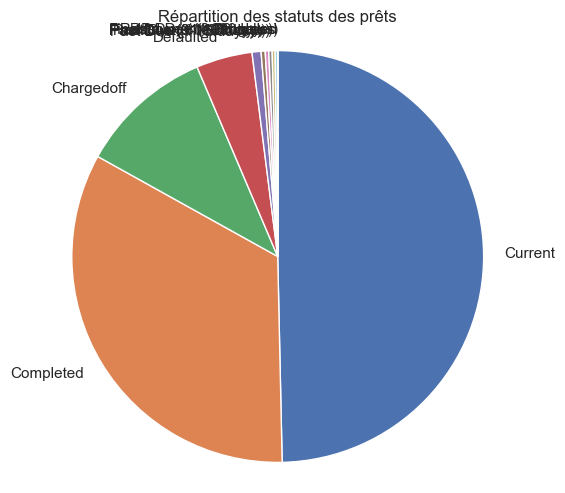

In [37]:
sorted_counts = df['LoanStatus'].value_counts()
plt.figure(figsize=[8,6])
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False)
plt.axis('square')
plt.title('Répartition des statuts des prêts')
plt.show()

##### Observation 
    De façon générale, les prêts sont soit en cours d'exercice (une large majorité), soit terminé. à défaut de cela, on retrouve quelques prêt qui ont été annulé.
#### Exploration 2
> Nous allons  présent scruter la répartition des statuts des emprunteurs (**EmploymentStatus**) pour voir si elle présente de choses intéressantes
##### Question
> Quel est la distribution du statut de l'emprunteur ?
##### Visualisation

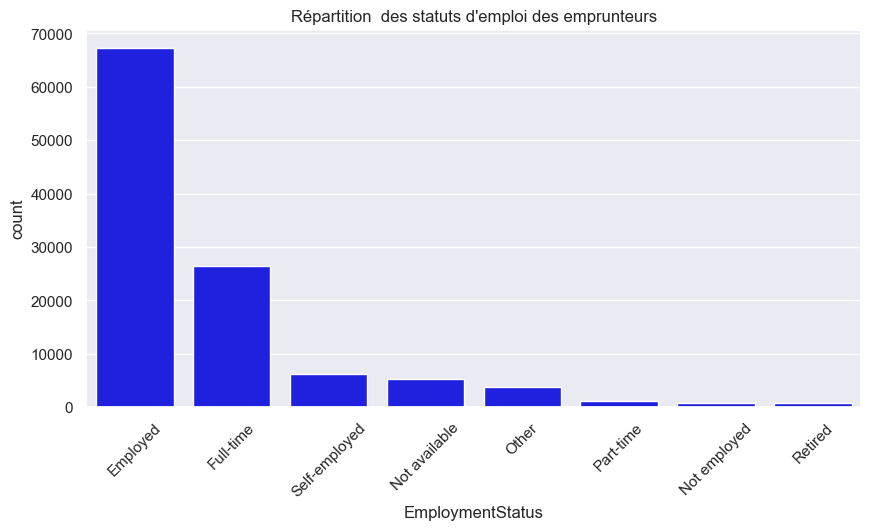

In [35]:
# Ordonner les valeurs de la variable
ordre = df.EmploymentStatus.value_counts().index
plt.figure(figsize=[10,5])
sb.countplot(x=df['EmploymentStatus'], color= 'blue', order=ordre)
plt.title("Répartition  des statuts d'emploi des emprunteurs")
plt.xticks(rotation=45)
plt.show()

##### Observation
    Les prêts sont largements dominés par les emprunteurs salariés et en temp plein
#### Exploration 3
> Examinons les professions des emprunteurs (**Occupation**).
##### Question
> Quel est la distribution des professions des empreunteurs ?
##### Visualisation

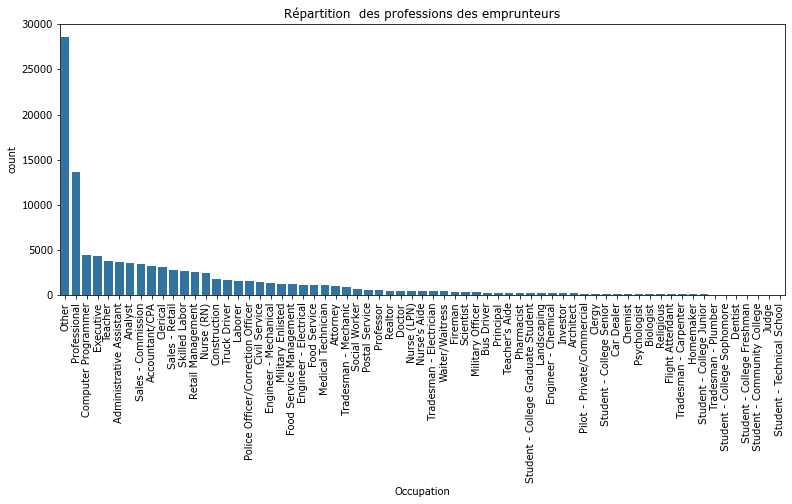

In [12]:
ordre = df.Occupation.value_counts().index

base_color = sb.color_palette()[0]
plt.figure(figsize=[13,5])
sb.countplot(x=df['Occupation'], color= base_color, order=ordre)
plt.title("Répartition  des professions des emprunteurs")
plt.xticks(rotation=90)
plt.show()

##### Observation
    La grande majorité des emprunteurs ont une profession non spécifié. Néanmoins, on note quelques profession d'emprunteurs qui se démarquent et d'autre très peu conserné comme les étudiants. 

<a div="au2"></a>
### A-2. Exploration d'une variable numérique
#### Exploration 4
> Nous passons  présent à explorer les montants initiaux des prêts.
##### Question :
Quelle est la distribution des monyants initiaux des prêts (**LoanOriginalAmount**) ?
##### Visualisation

C:\Users\mak-pc\AppData\Local\Temp\ipykernel_1060\330598426.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df['LoanOriginalAmount'])


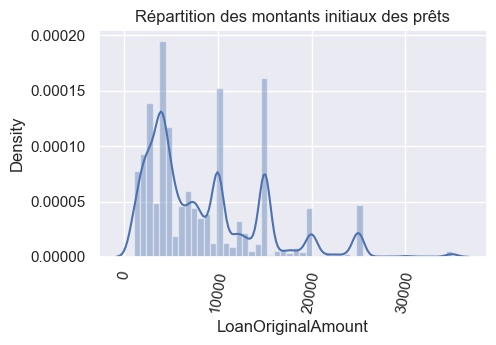

In [39]:
sb.set(rc={'figure.figsize':(5,3),"figure.dpi":100})
sb.distplot(df['LoanOriginalAmount'])
plt.title("Répartition des montants initiaux des prêts")
plt.xticks(rotation=80)
plt.show()


##### Observation
    On observe une forte quantité de prêt pour de faible montant initial (entre 2000 et 15000), avec un pic au tour de 4000$. 
#### Exploration 5
> Examinons le comportement des mensualités prévues des prêts.
##### Question :
La mensualité prévue du prêt (**MonthlyLoanPayment**) suit-elle une distribution normale ?
##### Visualisation

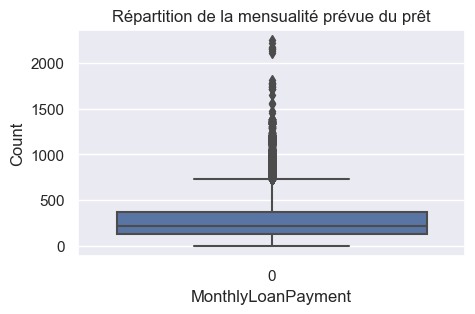

In [14]:
sb.boxplot(df['MonthlyLoanPayment'])
plt.title('Répartition de la mensualité prévue du prêt')
plt.xlabel("MonthlyLoanPayment")
plt.ylabel("Count")
plt.show()

##### Observation
    Nous observons qu'il y'a beaucoup de mensualité prévue de prêt qui sortent de l'ordinaire (au delà d'environ 750 Dollards).
#### Exploration 6
> Examinons la distribution des durées des prêts
##### Question
> Quel est la répartition de la durée des prêts (**Term**) ?
##### Visualisation

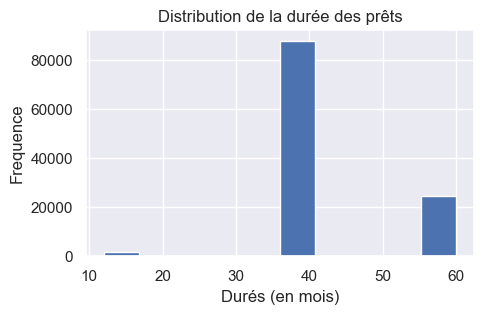

In [41]:
df['Term'].plot.hist()
plt.xlabel("Durés (en mois)")
plt.ylabel('Frequence')
plt.title("Distribution de la durée des prêts")
plt.show()

##### Observation
    On peut observer que la grande majorité des prêts dure 40 mois

<a div="au3"></a>
### A-3. Commentaire sur l'analyse univariée
##### Discutez de la ou des distributions de vos variables d'intérêt. Y avait-il des points inhabituels ? Avez-vous eu besoin d'effectuer des transformations ?
> L'état des prêts est fortement concentré entre les prêts en cours, les prêts terminés et ceux remboursés. Ceux en cours concentrent la plus grande partie. 
##### Parmi les fonctionnalités que vous avez étudiées, y avait-il des distributions inhabituelles ? Avez-vous effectué des opérations sur les données pour ranger, ajuster ou modifier la forme des données ? Si oui, pourquoi avez-vous fait cela ?
> Pour les autres fonctionnalités étudiées, nous avons relevés des valeurs aberrantes pour les mensualités prévues de prêt. toute fois, nous n'avons effectué aucune transformation ou modification sur ces données. 

<a div="an4"></a>
## **B- Analyse bivariée**
#### B-1.<a href="#ab1"> Exploration de la relation entre deux variables numériques</a>
#### B-2.<a href="#ab2"> Exploration de la relation entre une variable numérique et une variable qualitative</a>
#### B-3.<a href="#ab3"> Exploration de la relation entre deux variables qualitatives</a>
#### B-4.<a href="#ab4"> Commentaire sur l'analyse bivariée</a>

<a div="ab1"></a>
### B-1. Exploration de la relation entre deux variables numériques
#### Exploration 7
> Nous allons dans un premier temps explorer la relation entre le montant initial du prêt et sa mensualité de paiement.
##### Question
> Le montant initial (*LoanOriginalAmount*) a t-elle une influence sur la mensualité de paiement (*MonthlyLoanPayment*) d'un prêts ?
##### Visualisation

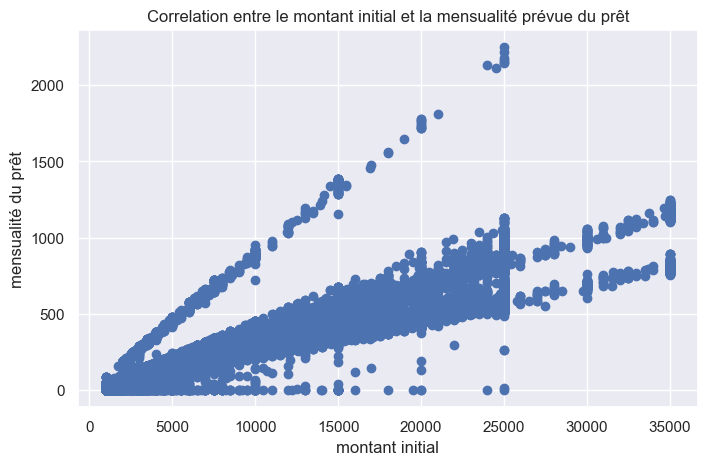

In [42]:
plt.figure(figsize = [8, 5])
plt.scatter(data = df, x = 'LoanOriginalAmount', y = 'MonthlyLoanPayment')
plt.xlabel("montant initial")
plt.ylabel("mensualité du prêt")
plt.title("Correlation entre le montant initial et la mensualité prévue du prêt")
plt.show()

##### Observation
    Malgré le cheuvauchement des points, nous observons une correlation positive relativement faible entre les deux variables pour la grande majorité de prêt mais beaucoup plus forte pour une petite partie.
#### Exploration 8
> Nous allons à présent explorer la relation entre les variables numériques de l'ensemble de données.
##### Question
> Y'a t-il une corrélation entre les variables **MonthlyLoanPayment** et **LoanOriginalAmount** par rapport aux autres variables numériques ?
##### Visualisation

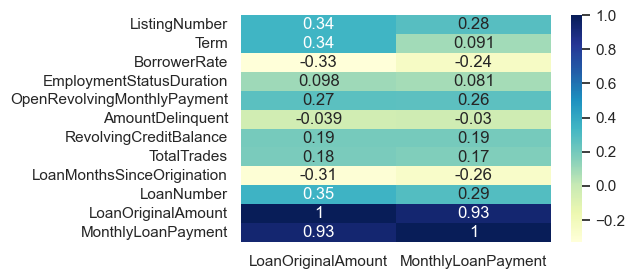

In [19]:
sb.heatmap(df.corr()[['LoanOriginalAmount','MonthlyLoanPayment']], annot=True, cmap='YlGnBu')
plt.show()

##### Observation
    On observe une quasi absence de correlation entre ces deux caractéristiques et les autres caractéristiques.

<a div="ab2"></a>
### B-2. Exploration de la relation entre une variable numérique et une variable qualitative
#### Exploration 9
> Nous allons ici explorer la correlation entre le statut du prêt et sa mensualiTé de paiement.
##### Question
> Le prêt soldé (**LoanStatus** : variable qualitative) est-il celui à faible mensualité de paiement (**MonthlyLoanPayment** : variable quantitative) ?
##### Visualisation

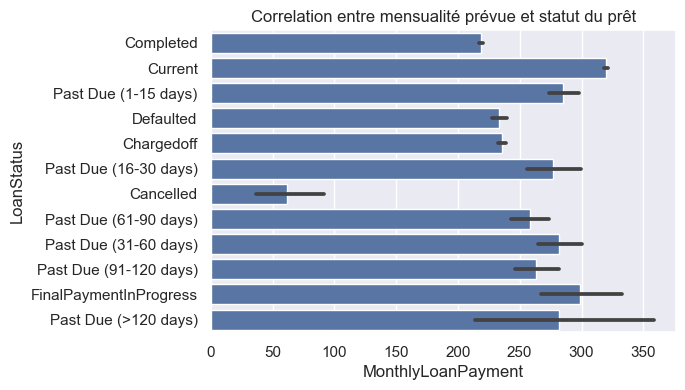

In [20]:
plt.figure(figsize = [6, 4])
base_color = sb.color_palette()[0]
sb.barplot(data=df, x='MonthlyLoanPayment',y='LoanStatus', color=base_color)
plt.title("Correlation entre mensualité prévue et statut du prêt")
plt.show()

##### Observation
    Les prêts à très faible mensualité prévue sont ceux qui ont été annulé (état "cancelled"). de plus, ceux en cours (état "Current") sont ceux avec une plus grande mensualité prévue.
#### Exploration 10
> Examinons la relation entre le statut de l'emploi de l'emprunteur et la durée du prêt.
##### Question
> Le statut d'emploi de l'emprunteur (**EmploymentStatus**) a t-il une influence sur la durée du prêt (**Term**) ?
##### Visualisation

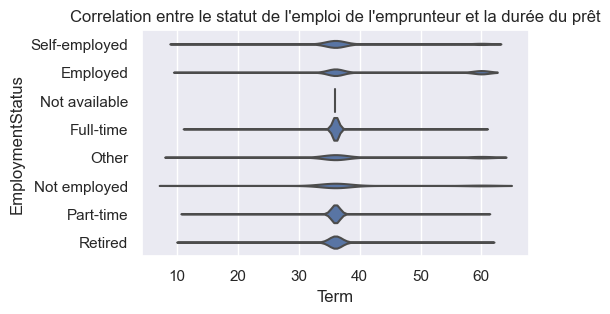

In [21]:
base_color = sb.color_palette()[0]
sb.violinplot(data=df, x='Term',y='EmploymentStatus', color=base_color, inner = None)
plt.title("Correlation entre le statut de l'emploi de l'emprunteur et la durée du prêt")
plt.show()

#### Exploration 11
> Examinons la relation entre la profession de l'emprunteur et la durée du prêt.
##### Question
> La profession de l'emprunteur (**Occupation**) a t-il une influence sur la durée du prêt (**Term**) ?
##### Visualisation

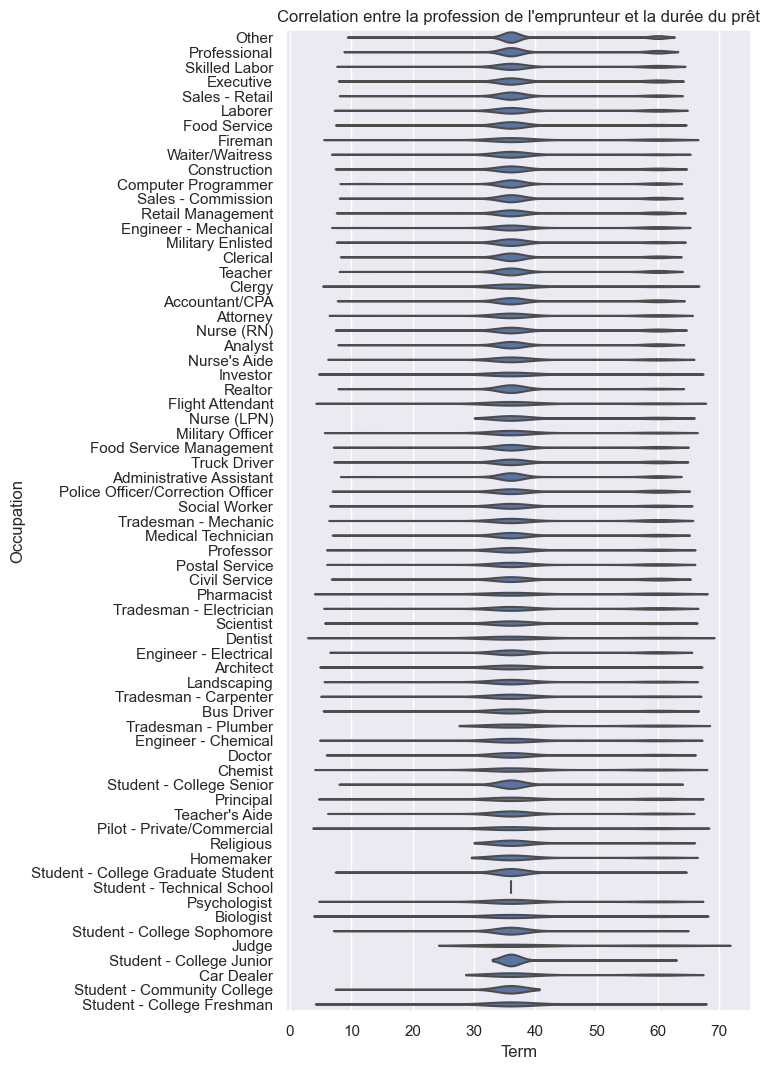

In [22]:
base_color = sb.color_palette()[0]
plt.figure(figsize = [6, 13])
sb.violinplot(data=df, x='Term',y='Occupation', color=base_color, inner = None)
plt.title("Correlation entre la profession de l'emprunteur et la durée du prêt")
plt.show()

##### Observation
    La durée du prêt est pratiquement indépendante du statut de l'emploi et de la profession de l'emprunteur. tous les prêts ont une durée relativement égale avec une médian au tour de 35 mois. Seul les emprunteurs au statut d'emploi "employé" et quelques profession bénéficient de quelques prêt d'une durée plus longue de 60 mois.

<a div="ab3"></a>
### B-3. Exploration de la relation entre deux variables qualitatives
#### Exploration 12
> Nous allons explorer la relation entre statut de l'emploi et statut du prêt.
##### Question
> Le statut de l'emploi de l'emprunteur (**EmploymentStatus**) a-t-il un incident sur le statut de son prêt (**LoanStatus**) ?
##### Visualisation

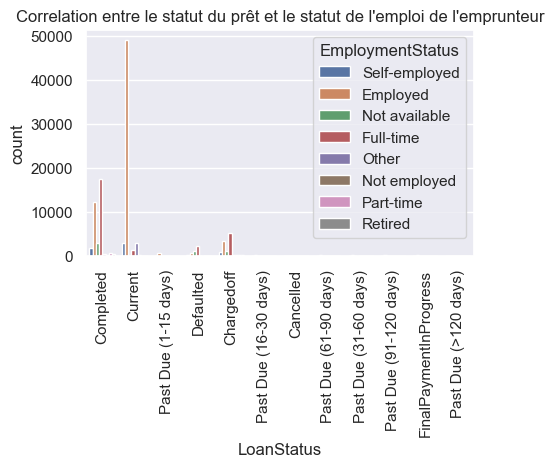

In [23]:
#plt.figure(figsize = [10, 4])
sb.countplot(data=df, x='LoanStatus', hue='EmploymentStatus')
plt.title("Correlation entre le statut du prêt et le statut de l'emploi de l'emprunteur")
plt.xticks(rotation=90)
plt.show()

##### Observation
    La grande majorité des prêts en cours ont été contracté par des emprunteurs au statut d'employé. par contre, le remboursement de prêt (statut "Completed") est plus réalisé par les employeurs ayant un emploi en temp plein. 
#### Exploration 13
> Nous souhaitons ici explorer la correlation entre la profession de l'emprunteur et le l'état du prêt
##### Question
> Existe t-il une relation entre les variables **Occupation** et **LoanStatus** ?
##### Visualisation

In [24]:
# Détermination de la matrice à tracer
nb_statut = df.groupby(['Occupation', 'LoanStatus']).size()
nb_statut = nb_statut.reset_index(name='count')
nb_statut = nb_statut.pivot(index = 'Occupation', columns = 'LoanStatus', values = 'count')

In [25]:
# Visualisons cette matrice
pd.set_option('display.max_rows', None)
nb_statut.head()

LoanStatus,Cancelled,Chargedoff,Completed,Current,Defaulted,FinalPaymentInProgress,Past Due (1-15 days),Past Due (16-30 days),Past Due (31-60 days),Past Due (61-90 days),Past Due (91-120 days),Past Due (>120 days)
Occupation,,,,,,,,,,,,
Accountant/CPA,NaN,250.0,1154.0,1675.0,93.0,6.0,23.0,10.0,8.0,7.0,7.0,NaN
Administrative Assistant,1.0,460.0,1257.0,1671.0,216.0,4.0,34.0,8.0,8.0,14.0,15.0,NaN
Analyst,NaN,226.0,1451.0,1758.0,100.0,7.0,21.0,7.0,10.0,11.0,10.0,1.0
Architect,NaN,19.0,94.0,90.0,7.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN
Attorney,NaN,36.0,384.0,603.0,13.0,1.0,1.0,3.0,3.0,1.0,1.0,NaN


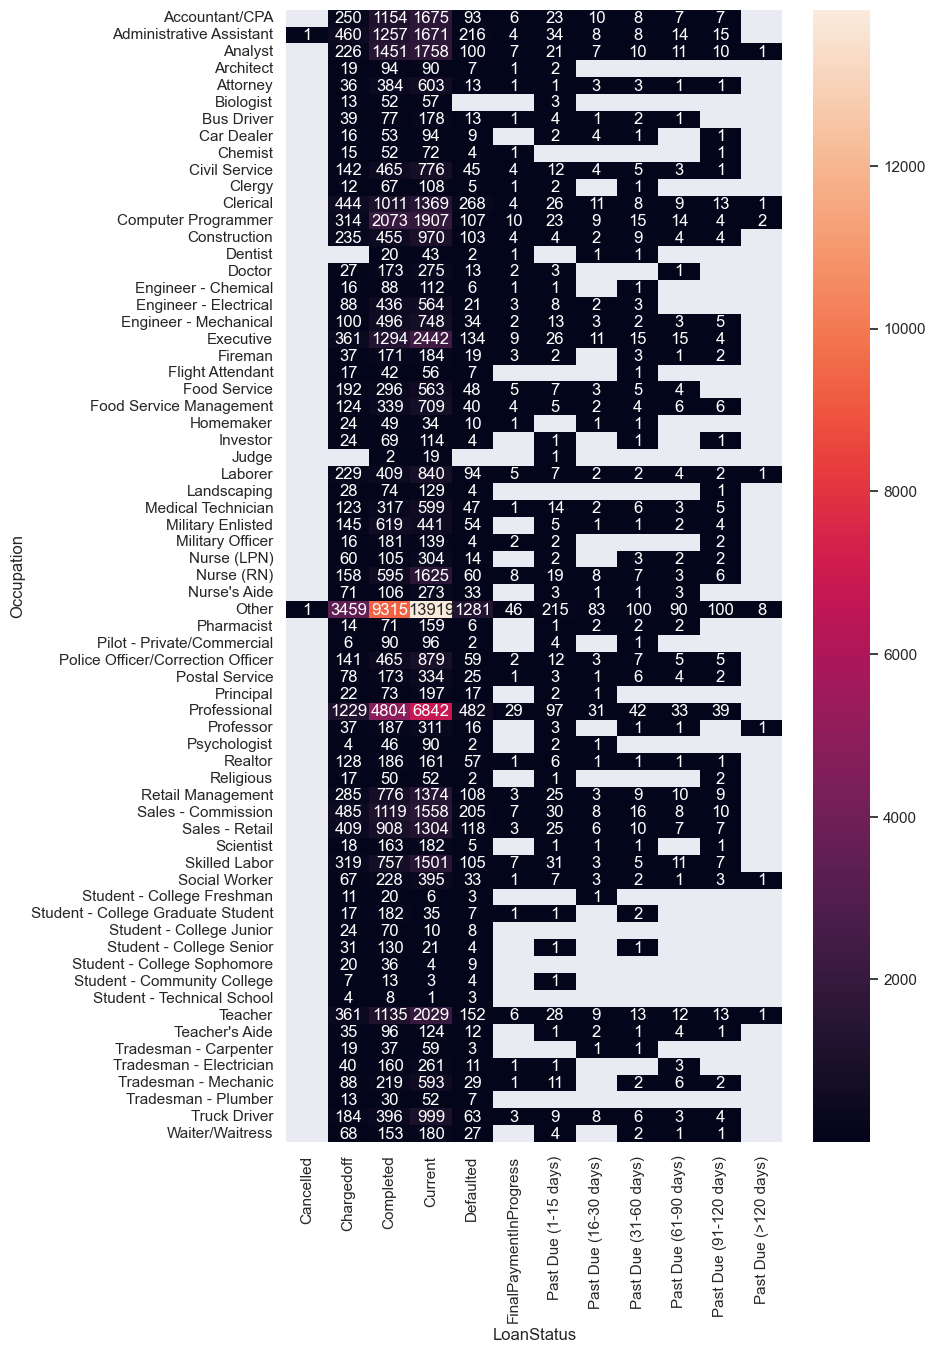

In [26]:
# Tracé 
plt.figure(figsize = [8, 15])
sb.heatmap(nb_statut, annot = True, fmt = '.0f')
plt.show()

##### Observation
    La principale observation est que les prêts en cours qui concerne la plus grande majorité des prêts ont été contracté pas des emprunteur dont la profession nest pas spécifiée 

<a div="ab4"></a>
### B-4. Commentaire sur l'analyse bivariée
##### Parlez de certaines des relations que vous avez observées dans cette partie de l'enquête. Comment la ou les caractéristiques d'intérêt ont-elles varié avec d'autres caractéristiques de l'ensemble de données ?
> Les enquêtes de cette session nous montrent que je statut de l'emploi de l'emprunteur, sa profession ainsi que le montant initial du prêt ont une forte influence sur l'état du prêt. Ainsi, on a peu observer que les prêts à faible montant initial sont généralement annulés voir terminés. Par contre, ceux en cours sont majoritairement contractés par des salariés aux types d'emploi non spécifiés.
##### Avez-vous observé des relations intéressantes entre les autres caractéristiques (pas la ou les principales caractéristiques d'intérêt) ?
> OUi ! nous avons observé une forte relation entre me montant initial et la mensualité de paiement du pret.

<a div="an5"></a>
## **C- Analyse multivariée**
#### C-1.<a href="#am1"> Exploration de la relation entre une variable nupérique et deux variables catégorielle</a>
#### C-2.<a href="#am2"> Exploration de la relation entre deux variables nupériques et une variable catégorielle </a>
#### C-3.<a href="#am3"> Exploration de la relation entre trois variables nupériques </a>
#### C-4.<a href="#am4"> Exploration de la relation entre trois variables catégorielle </a>
#### C-5.<a href="#am5"> Commentaire sur l'analyse multivariée</a>

<a div="am1"></a>
### C-1. Exploration de la relation entre une variable nupérique et deux variables catégorielles 
#### Exploration 14 :
> Nous allons commencer ici par explorer la relation entre la mensualité de paiement (*variable numérique*), l'état du prêt (*variable catégorielle*) et le statut de l'emploi de l'emprunteur (*variable catégorielle*).
##### Question
> Existe t-il une correlation entre **LoanStatus**, **EmploymentStatus** et **MonthlyLoanPayment** ?
##### Visualisation

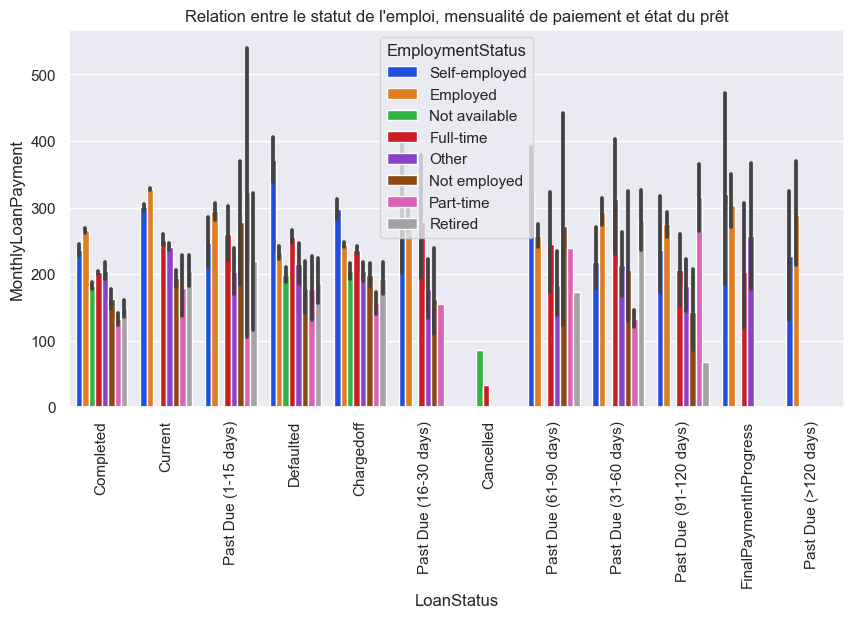

In [27]:
plt.figure(figsize = [10, 5])
sb.barplot(x='LoanStatus', y='MonthlyLoanPayment', data=df, palette='bright', hue='EmploymentStatus')
plt.title("Relation entre le statut de l'emploi, mensualité de paiement et état du prêt")
plt.xticks(rotation=90)
plt.show()

##### Observation
    Les prêts annulés ont une mensualité prévue de moins de 100$ et les emplois impactés sont ceux non disponible et à temp plein.

<a div="am2"></a>
### C-2. Exploration de la relation entre deux variables nupériques et une variable catégorielle 
#### Exploration 15 :
> Il est question pour nous ici, d'explorer la relation entre la mensualité de paiement (*variable numérique*), l'état du prêt (*variable catégorielle*) et le montant initial du prêt (*variable numérique*).
##### Question
> Existe t-il une correlation entre **LoanOriginalAmount**, **MonthlyLoanPayment** et **LoanStatus** ?
##### Visualisation

c:\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


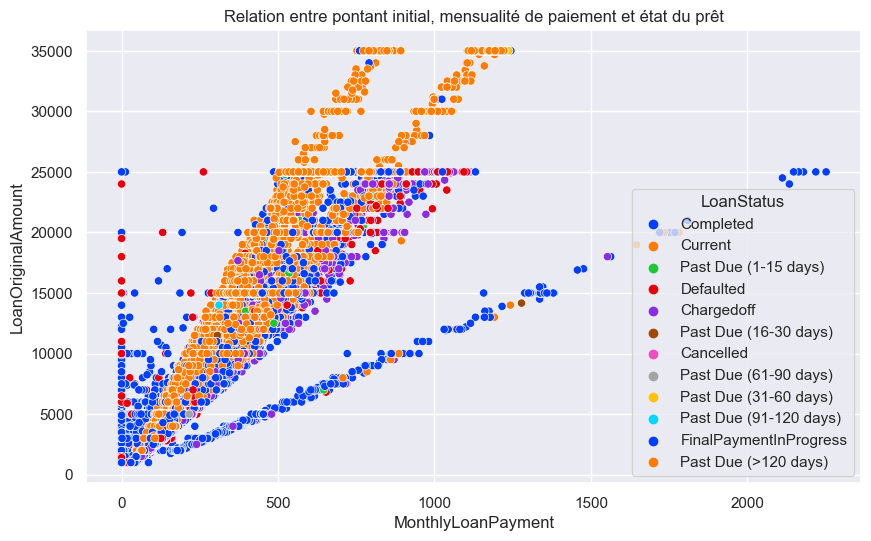

In [28]:
plt.figure(figsize = [10, 6])
sb.scatterplot(x='MonthlyLoanPayment', y='LoanOriginalAmount', data=df, palette='bright', hue='LoanStatus')
plt.title('Relation entre pontant initial, mensualité de paiement et état du prêt')
plt.show()

##### Observation
    Les prêt en cours ont un montant initial supérieur à 25000$. Il existe une correlation positive souple entre les trois variables.

<a div="am3"></a>
### C-3. Exploration de la relation entre trois variables nupériques 
#### Exploration 16 :
> Il est question pour nous ici, d'explorer la relation entre la mensualité de paiement (*variable numérique*), la durée du prêt (*variable numérique*) et le montant initial du prêt (*variable numérique*).
##### Question
> Existe t-il une correlation entre **Term**, **LoanOriginalAmount** et **MonthlyLoanPayment** ?
##### Visualisation

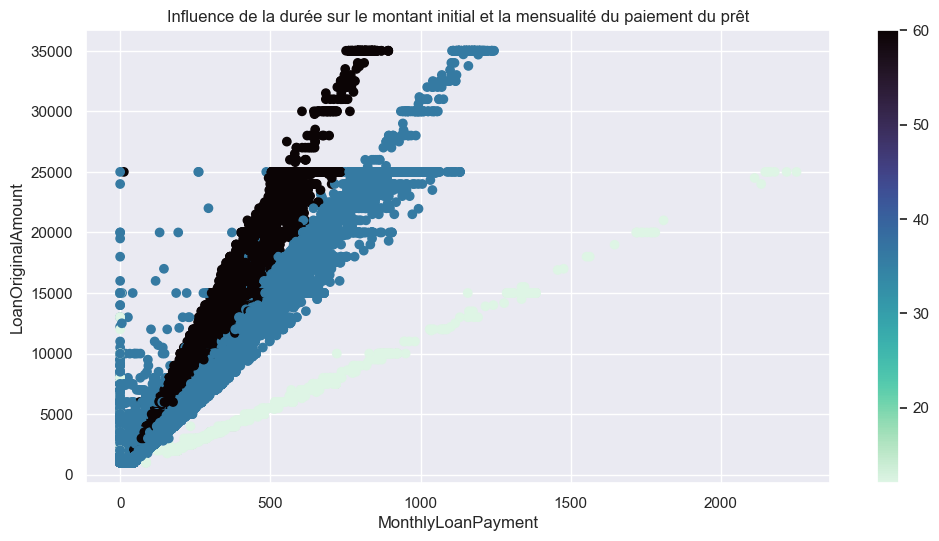

In [29]:
plt.figure(figsize = [12, 6])
plt.scatter(data = df, x = 'MonthlyLoanPayment', y = 'LoanOriginalAmount', c = 'Term', cmap = 'mako_r')
plt.colorbar()
plt.title('Influence de la durée sur le montant initial et la mensualité du paiement du prêt')
plt.xlabel('MonthlyLoanPayment')
plt.ylabel('LoanOriginalAmount')
plt.show()

##### Observation
    Les prêt sont principalement contractés pour des durées de 40 et 60 mois. on observe également une correlation positive significative entre le montant initial du prêt et sa mensualité de paiement.

<a div="am4"></a>
### C-4. Exploration de la relation entre trois variables catégorielles 
#### Exploration 17 :
> Il est question pour nous ici, d'explorer la relation entre l'état du prêt (*variable catégorielle*), le statut de l'emploi de l'emprunteur (*variable catégorielle*) et la profession de l'emprunteur (*variable qualitative*).
##### Question
> Existe t-il une correlation entre **LoanStatus**, **EmploymentStatus** et **Occupation** ?
##### Visualisation

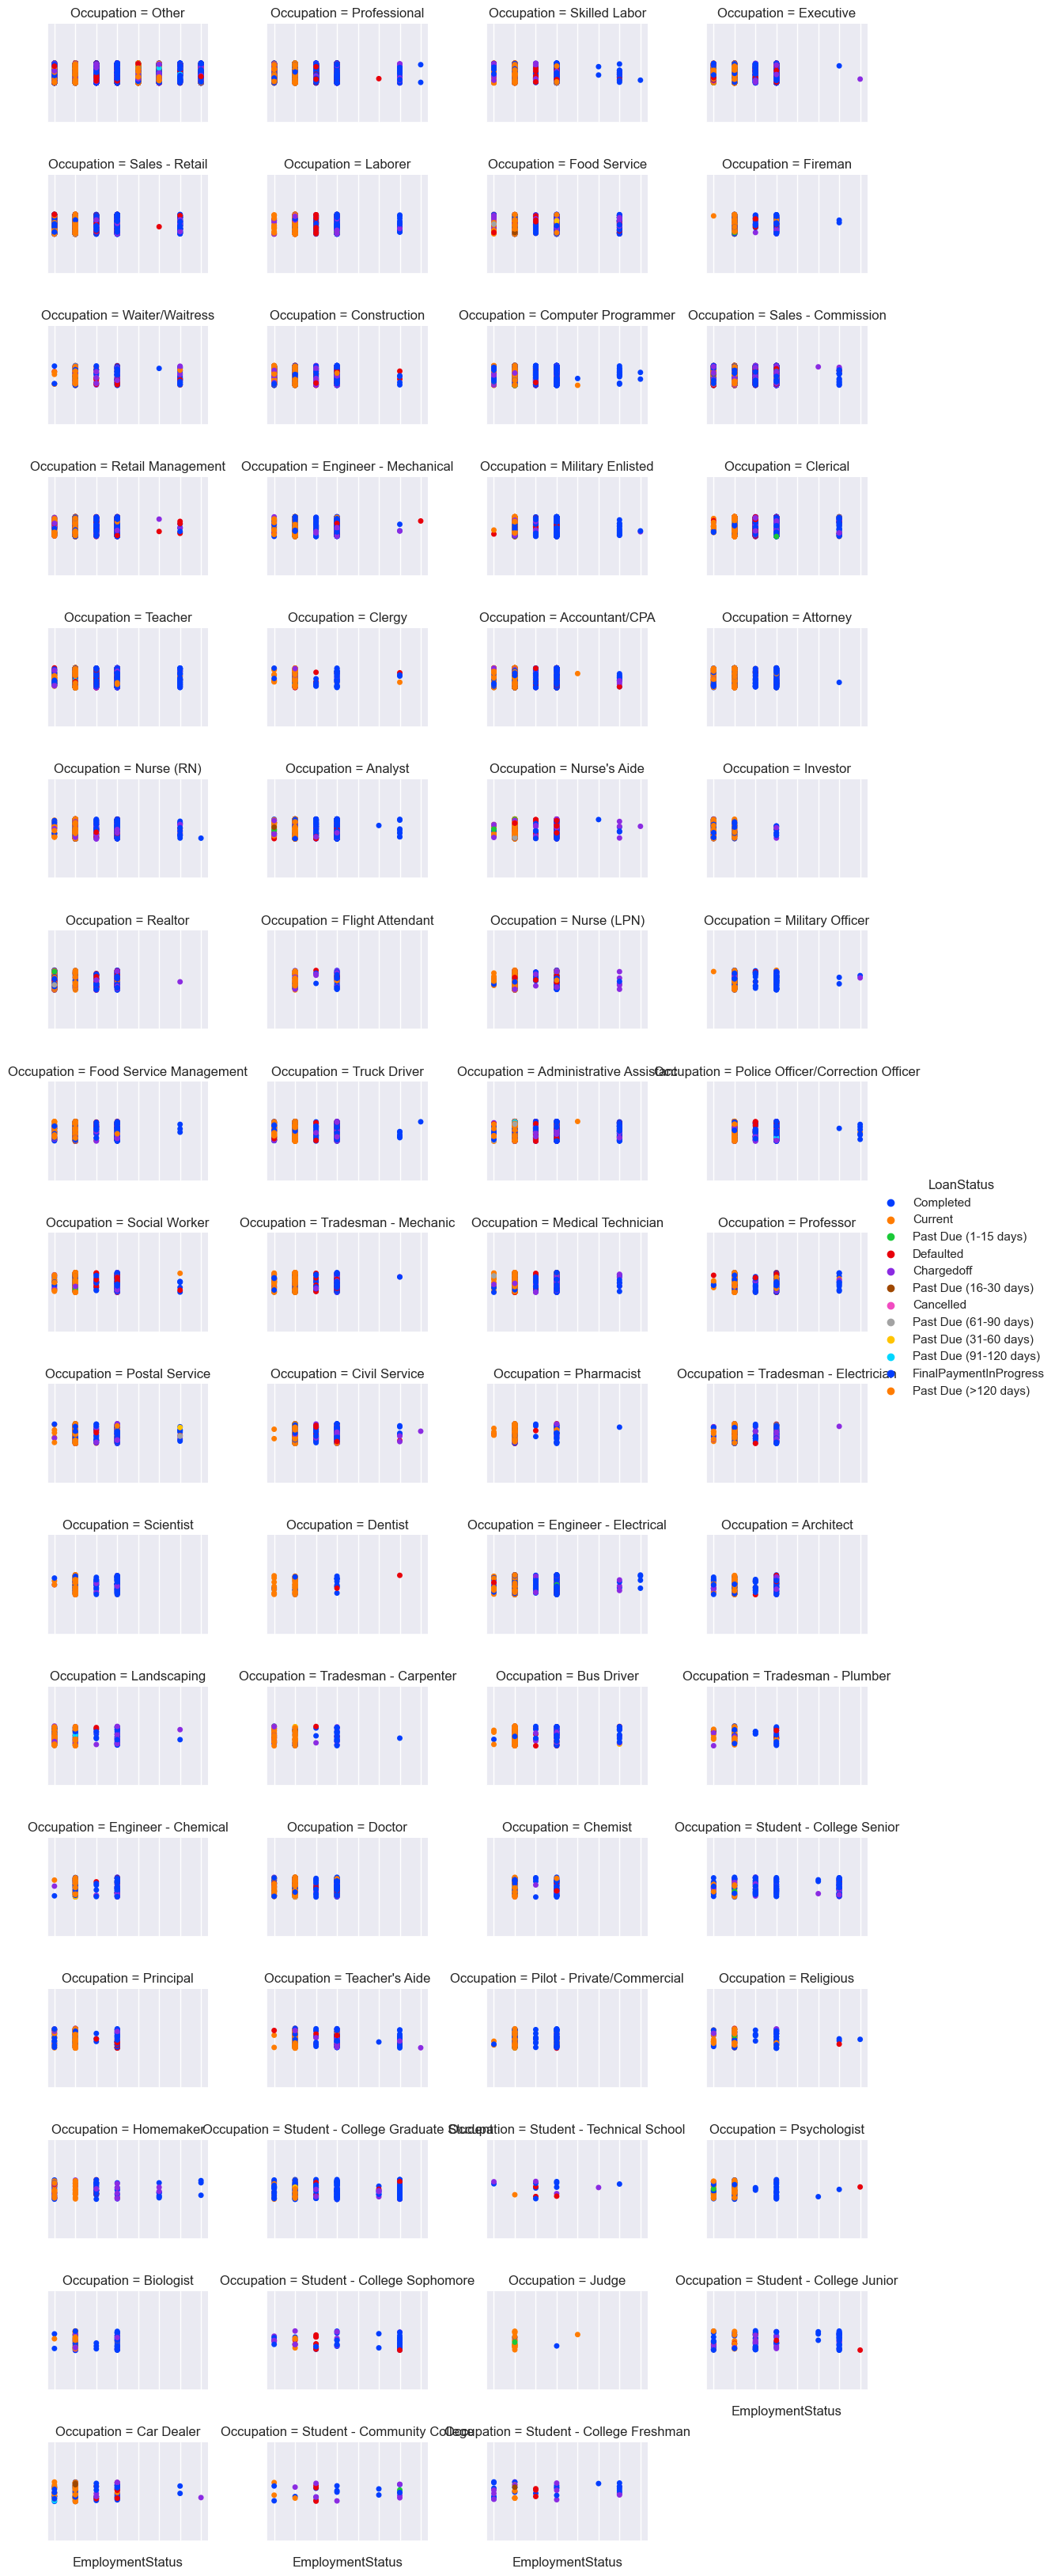

In [30]:
graph = sb.catplot(data=df, x="EmploymentStatus", palette='bright', kind='strip', hue='LoanStatus', col='Occupation', height=2, aspect=1.4, col_wrap=4)
graph.set_xticklabels(ha='right', rotation=45)
plt.show()

##### Observation
    Bienque les valeurs soient assez nombreuses et dont difficile à lire, on peut tout de même souligner une influence de lemploi non défini sur les statut d'emploi et l'état du prêt.

<a div="am5"></a>
### C-5. Commentaire sur l'analyse multivariée
##### Parlez de certaines des relations que vous avez observées dans cette partie de l'enquête. Y a-t-il eu des fonctionnalités qui se sont renforcées en termes d'examen de vos fonctionnalités d'intérêt ?

> Dans cette partie de lenquête, nous avons pu observer que les prêts sont principalement contractés pour les durées de 40 et 60 mois. de plus, nous avons souligné une correlation positive entre le montant initial du prêt et sa mensualité prévue.

##### Y a-t-il eu des interactions intéressantes ou surprenantes entre les fonctionnalités ?

> Nous avons observé une interaction interessante en ce sens que, la majorité des prêts en cours ont été contracté par des salarié avec un type d'enploi non spécifié.  

<a div="ccsion"></a>
## **Conclusion**
> Arrivé au terme de notre enquête qui a porté sur l'analyse exploratoire de l'ensemble des données **prosperLoanData**, relative à 113 937 prêts avec 81 variables sur chaque prêt, il en ressort que le statut d'un prêt est fonction du statut de l'emploi de l'emprunteur et de sa mensualité prévue de paiement. cette mensualité de paiement est elle aussi fonction du montant initial qu prêt et aussi de la profession de l'emprunteur. Ainsi, on a pu observer que la majorité des prêts annulés sont ceux avec un très faible montant initial, et ceux en cours sont principalement contractés par des salariés avec un type d'emploi non spcifié. Cette enquête pourrait s'étendre à observation des rapports entre le taux d'interêt de l'emprunteur et le statut du prêt et aussi entre le nombre de ligne de crédit accordé à un emprunteur et son revenu. 
